In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Absolute paths
data_path = '/Users/junshao/bootcamp_Jun_Shao/homework/hw9/data/processed/updated_encoded_train.csv'
docs_path = '/Users/junshao/bootcamp_Jun_Shao/homework/hw9/docs'

# Load data
df = pd.read_csv(data_path)
print("Dataset Shape:", df.shape)

Dataset Shape: (1460, 112)


In [ ]:
# Feature Engineering for Ames Housing Dataset

This notebook creates new features for the processed dataset (`updated_encoded_train.csv`) to enhance house price prediction. Features are based on EDA insights (e.g., importance of GrLivArea, OverallQual, age).

In [4]:
# Feature 1: TotalBath (combine bathroom counts)
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']

In [5]:
## Feature 1: TotalBath
- **Code**: `df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']`
- **Rationale**: Combines full and half bathrooms (above-ground and basement) into a single metric, weighting half baths at 0.5. EDA showed FullBath has high correlation (~0.8) with SalePrice; aggregating captures total bathroom utility, enhancing model interpretability.

SyntaxError: invalid syntax (246643009.py, line 2)

In [6]:
# Feature 2: QualityArea (interaction of quality and living area)
df['QualityArea'] = df['OverallQual'] * df['GrLivArea']

In [ ]:
## Feature 2: QualityArea
- **Code**: `df['QualityArea'] = df['OverallQual'] * df['GrLivArea']`
- **Rationale**: Multiplies OverallQual (quality score) with GrLivArea (living area) to capture interaction. EDA showed both are top predictors (~0.7-0.8 correlation with SalePrice). High-quality large homes likely command premium prices.

In [7]:
# Feature 3: RoomDensity (rooms per living area)
df['RoomDensity'] = df['TotRmsAbvGrd'] / df['GrLivArea']

In [ ]:
## Feature 3: RoomDensity
- **Code**: `df['RoomDensity'] = df['TotRmsAbvGrd'] / df['GrLivArea']`
- **Rationale**: Divides total rooms (above ground) by living area to measure layout efficiency. EDA highlighted GrLivArea's importance; this feature tests if denser layouts impact price differently.

Correlation with SalePrice for new features:
 TotalBath      0.631731
QualityArea    0.826609
RoomDensity   -0.550144
Name: SalePrice, dtype: float64


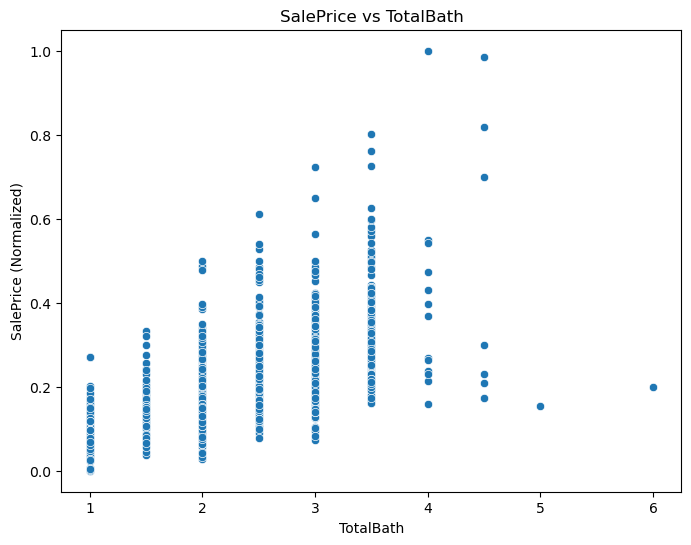

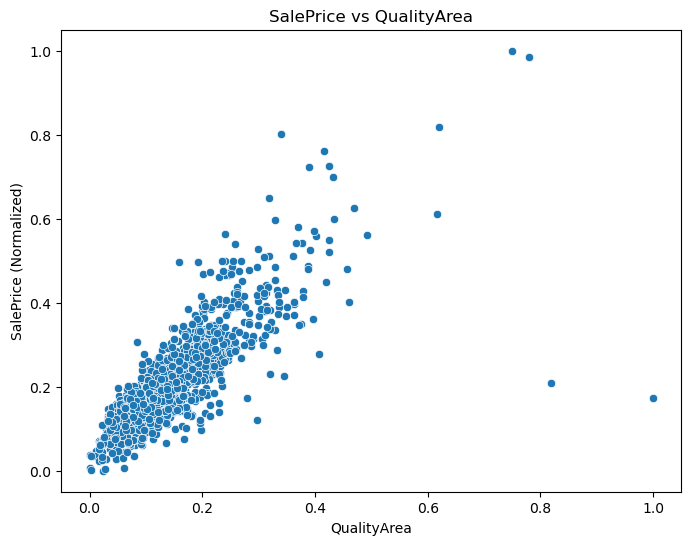

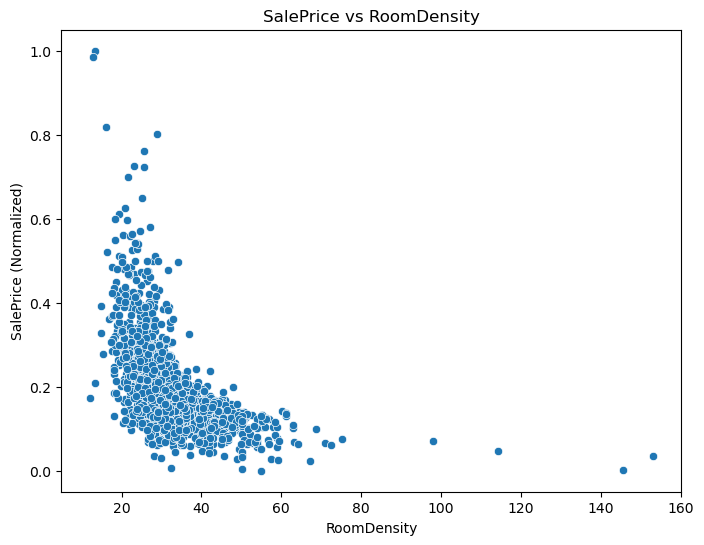

In [8]:
# Correlation with SalePrice
new_features = ['TotalBath', 'QualityArea', 'RoomDensity']
corrs = df[new_features + ['SalePrice']].corr()['SalePrice'].drop('SalePrice')
print("Correlation with SalePrice for new features:\n", corrs)

# Scatter plots for new features vs SalePrice
for feature in new_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice (Normalized)')
    plt.savefig(os.path.join(docs_path, f'saleprice_vs_{feature}.png'))
    plt.show()

In [9]:
# Save updated dataset
output_path = '/Users/junshao/bootcamp_Jun_Shao/homework/hw9/data/processed/engineered_train.csv'
df.to_csv(output_path, index=False)
print(f"Saved engineered dataset to {output_path}")

Saved engineered dataset to /Users/junshao/bootcamp_Jun_Shao/homework/hw9/data/processed/engineered_train.csv
